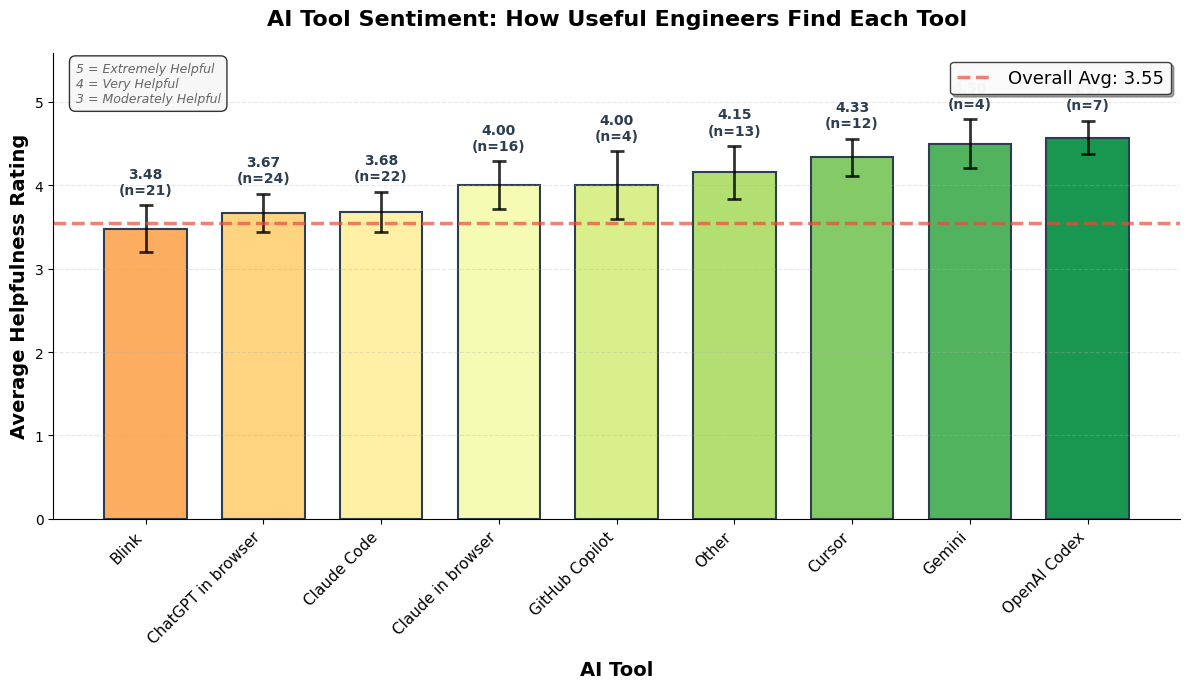


AI TOOL SENTIMENT ANALYSIS

📊 Overall Average Helpfulness: 3.55/5.0
   Total Engineers: 33

🛠️  Tool Sentiment Rankings (Highest to Lowest):
Rank   Tool                           Avg Rating   Users    vs Avg    
1      OpenAI Codex                   4.57         7        +1.03     
2      Gemini                         4.50         4        +0.95     
3      Cursor                         4.33         12       +0.79     
4      Other                          4.15         13       +0.61     
5      Claude in browser              4.00         16       +0.45     
6      GitHub Copilot                 4.00         4        +0.45     
7      Claude Code                    3.68         22       +0.14     
8      ChatGPT in browser             3.67         24       +0.12     
9      Blink                          3.48         21       -0.07     

✨ Key Insights:

   🏆 Highest Rated Tools:
   1. OpenAI Codex: 4.57/5.0 (7 users)
   2. Gemini: 4.50/5.0 (4 users)
   3. Cursor: 4.33/5.0 (12 users

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Load the data
df = pd.read_csv('../responses.csv')

# Filter out non-engineering teams
teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[~df['Which team are you a part of?'].isin(teams_to_exclude)].copy()

# Get column names
tools_col = df_filtered.columns[13]  # Column N - AI tools
helpfulness_col = 'On a scale of 1 to 5, how would you rate the overall helpfulness of AI in your daily development tasks?'

# Create numeric mapping for helpfulness
rating_values = {
    'Extremely Helpful': 5,
    'Very Helpful': 4,
    'Moderately Helpful': 3,
    'Slightly Helpful': 2,
    'Not Helpful': 1
}

df_filtered['rating_numeric'] = df_filtered[helpfulness_col].map(rating_values)

# Parse tool usage and calculate average sentiment per tool
tool_ratings = defaultdict(list)

for idx, row in df_filtered.iterrows():
    if pd.notna(row[tools_col]) and pd.notna(row['rating_numeric']):
        tools = [tool.strip() for tool in row[tools_col].split(',')]
        rating = row['rating_numeric']
        
        for tool in tools:
            tool_ratings[tool].append(rating)

# Calculate statistics for each tool
tool_stats = []
for tool, ratings in tool_ratings.items():
    avg = np.mean(ratings)
    count = len(ratings)
    std_dev = np.std(ratings, ddof=1)  # Sample standard deviation
    sem = std_dev / np.sqrt(count)  # Standard error of the mean
    tool_stats.append({
        'Tool': tool,
        'Avg_Rating': avg,
        'Count': count,
        'Std_Dev': std_dev,
        'SEM': sem
    })

# Convert to DataFrame and sort by average rating
tool_sentiment_df = pd.DataFrame(tool_stats)
tool_sentiment_df = tool_sentiment_df.sort_values('Avg_Rating', ascending=True)

# Calculate overall average
overall_avg = df_filtered['rating_numeric'].mean()

# Create figure with wider aspect for better label readability
fig, ax = plt.subplots(figsize=(12, 7))

# Create color gradient based on rating (red-yellow-green)
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(tool_sentiment_df)))

# Create vertical bar chart with error bars (using standard error of the mean)
bars = ax.bar(range(len(tool_sentiment_df)), tool_sentiment_df['Avg_Rating'], 
               yerr=tool_sentiment_df['SEM'], 
               color=colors, width=0.7, edgecolor='#2C3E50', 
               linewidth=1.5, capsize=5, error_kw={'linewidth': 2, 'capthick': 2, 'alpha': 0.8})

# Add value labels with count on top of bars
for i, (bar, avg, count, sem) in enumerate(zip(bars, tool_sentiment_df['Avg_Rating'], 
                                                 tool_sentiment_df['Count'], tool_sentiment_df['SEM'])):
    # Position label above the bar + error bar
    label_y = avg + sem + 0.1
    ax.text(bar.get_x() + bar.get_width()/2, label_y, 
            f'{avg:.2f}\n(n={int(count)})', 
            ha='center', va='bottom', fontsize=10, weight='bold', color='#2C3E50')

# Add overall average line
ax.axhline(overall_avg, color='#E74C3C', linestyle='--', linewidth=2.5, 
          alpha=0.7, label=f'Overall Avg: {overall_avg:.2f}')

# Customize plot
ax.set_xlabel('AI Tool', fontsize=14, weight='bold', labelpad=10)
ax.set_ylabel('Average Helpfulness Rating', fontsize=14, weight='bold')
ax.set_title('AI Tool Sentiment: How Useful Engineers Find Each Tool', 
            fontsize=16, weight='bold', pad=20)

# Set x-axis ticks and labels with rotation for readability
ax.set_xticks(range(len(tool_sentiment_df)))
ax.set_xticklabels(tool_sentiment_df['Tool'], rotation=45, ha='right', fontsize=11)

# Set ylim to accommodate error bars and labels
max_with_error = (tool_sentiment_df['Avg_Rating'] + tool_sentiment_df['SEM']).max()
ax.set_ylim(0, max(5.5, max_with_error + 0.8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=13, loc='upper right', framealpha=0.95, edgecolor='#333333', 
          facecolor='white', fancybox=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)

# Add rating scale reference
ax.text(0.02, 0.98, '5 = Extremely Helpful\n4 = Very Helpful\n3 = Moderately Helpful', 
        transform=ax.transAxes, ha='left', va='top',
        fontsize=9, style='italic', color='#666666',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#F5F5F5', alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "="*80)
print("AI TOOL SENTIMENT ANALYSIS")
print("="*80)

print(f"\n📊 Overall Average Helpfulness: {overall_avg:.2f}/5.0")
print(f"   Total Engineers: {len(df_filtered)}")

print(f"\n🛠️  Tool Sentiment Rankings (Highest to Lowest):")
print(f"{'Rank':<6} {'Tool':<30} {'Avg Rating':<12} {'Users':<8} {'vs Avg':<10}")
print("="*80)

for i, (_, row) in enumerate(tool_sentiment_df.sort_values('Avg_Rating', ascending=False).iterrows(), 1):
    tool = row['Tool']
    avg = row['Avg_Rating']
    count = int(row['Count'])
    diff = avg - overall_avg
    
    # Determine if above or below average
    comparison = f"+{diff:.2f}" if diff > 0 else f"{diff:.2f}"
    
    print(f"{i:<6} {tool:<30} {avg:<12.2f} {count:<8} {comparison:<10}")

print(f"\n✨ Key Insights:")

# Top 3 tools
top_3 = tool_sentiment_df.nlargest(3, 'Avg_Rating')
print(f"\n   🏆 Highest Rated Tools:")
for i, (_, row) in enumerate(top_3.iterrows(), 1):
    print(f"   {i}. {row['Tool']}: {row['Avg_Rating']:.2f}/5.0 ({int(row['Count'])} users)")

# Bottom 3 tools
bottom_3 = tool_sentiment_df.nsmallest(3, 'Avg_Rating')
print(f"\n   ⚠️  Lowest Rated Tools:")
for i, (_, row) in enumerate(bottom_3.iterrows(), 1):
    print(f"   {i}. {row['Tool']}: {row['Avg_Rating']:.2f}/5.0 ({int(row['Count'])} users)")

# Tools above/below average
above_avg = tool_sentiment_df[tool_sentiment_df['Avg_Rating'] > overall_avg]
below_avg = tool_sentiment_df[tool_sentiment_df['Avg_Rating'] < overall_avg]

print(f"\n   • {len(above_avg)} tools rated above average")
print(f"   • {len(below_avg)} tools rated below average")

# Most/least popular
most_popular = tool_sentiment_df.nlargest(1, 'Count').iloc[0]
print(f"\n   • Most used tool: {most_popular['Tool']} ({int(most_popular['Count'])} users, {most_popular['Avg_Rating']:.2f} rating)")

print("\n" + "="*80 + "\n")